# Rozkłady prawdopodobieństwa a testowanie hipotez

Aby zilustrować związek pomiędzy <b> rozkładami prawdopodobieństwa</b> a <b> testowaniem hipotez </b>, rozważmy następujący problem:

<ul>
<li> Załóżmy, że mamy grę planszową, która zależy rzutu kostką. Oczywiście jak dostaniemy wynik $6$ to poruszamy się najszybciej. W danej grze $6$wypadła $51$ razy w ciągu $235$ rzutów. </li>
<li> Jeśli kostka jest uczciwa, oczekiwalibyśmy, że $6$ wypadnie $235/6 =39.17$ razy. </li>
<li> Czy kostka aby na pewno jest uczciwa? </li>
</ul>

In [24]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

Definiujemy zmienną losową o rozkładzie dwumianowym z parametrami $p=\frac{1}{6}$ oraz $n=235$.

Gdy zmienna losowa $X$ ma rozkład dwumianowy z parametrami $p$ i $n$, zapisujemy go jako $X \thicksim B(n,p)$, a gęstość wyrażona jest wzorem:
$$
P(X = k) = {n \choose k} p^k (1-p)^{n-k},
$$
gdzie
$
{n \choose k} = \frac{n!}{k!(n-k)!}.
$

# Zadanie 
Rozstrzygnij czy kostka jest symetryczna i wykonaj odpowiedni rysunek uwzględniając gęstość i dystrybuantę rozkładu dwumianowego.

Aby odpowiedzieć na to pytanie, możemy postępować w następujący sposób:
<ul>
<li> Skontrujmy rozkład dwumianowy z parametrami $n = 235$ i $p = \frac{1}{6}$. </li>
</ul>

In [63]:
(p, num) = (1./6, 235)
nd = stats.binom(num, p)

<ul>
<li> Zakładamy, że kostka jest uczciwa.</li> 
<li> Obliczymy prawdopodobieństwo wypadnięcia dokładnie $51$ razy $6$, $52$ razy i itd. Następnie dodajmy te wyniki. W ten sposób obliczy prawdopodobieństwo wypadnięcia dokładnie $51$ razy $6$ lub wyniku większego $P(X \geq 51)$ </li>
</ul>

In [64]:
# Shade the regions beyond a certain "checkVal"
checkVal = 50
print('p = {0:5.4f}'.format(nd.sf(checkVal)))
print('p = {0:5.4f}'.format(1-nd.cdf(checkVal)))

p = 0.0265
p = 0.0265


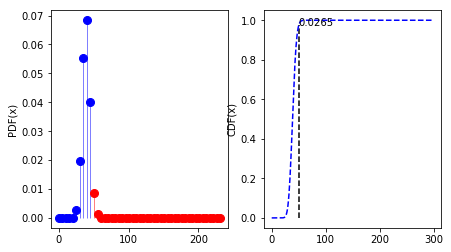

In [65]:
x0=nd.sf(checkVal)

ax.set_xlim([0,235])
#ax.set_ylim([0,1])
x1 = np.arange(0, 50,5)
x2 = np.arange(51, 235,5)

figs, axs = plt.subplots(1,2, figsize=(7, 4))

axs[0].plot(x1, nd.pmf(x1), 'bo', ms=8, label='bernoulli pmf')
axs[0].vlines(x1, 0, stats.binom.pmf(x1, num, p), colors='b', lw=1, alpha=0.5)
axs[0].plot(x2, nd.pmf(x2), 'ro', ms=8, label='bernoulli pmf')
axs[0].vlines(x2, 0, stats.binom.pmf(x2, num, p), colors='r', lw=1, alpha=0.5)
axs[0].set_ylabel('PDF(x)')

#axs[1].plot(x, y, '#999999', lw=3)
axs[1].plot(x, nd.cdf(x), 'b--', ms=8, label='bernoulli cdf')
#axs[1].set_xlabel('x')
axs[1].set_ylabel('CDF(x)')
#axs[1].text(checkVal, nd.cdf(checkVal), np.round(nd.cdf(checkVal),4))
#axs[1].vlines(checkVal, 0, nd.cdf(checkVal), linestyles='--')
axs[1].vlines(checkVal, 0, nd.cdf(checkVal), linestyles='--')
axs[1].text(checkVal, nd.cdf(checkVal), np.round(nd.sf(checkVal),4))
plt.show()
#print(2*x0)